# Grid Approximation and Posterior Predictive Distribution

## Set up

In [15]:
using Distributions
using StatsBase
using Plots
using StatsPlots

## Define grid for prior

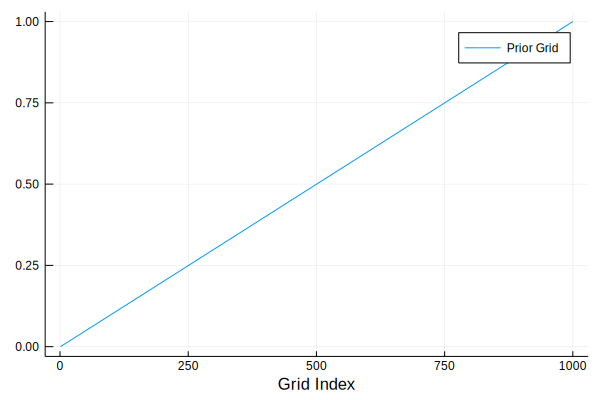

In [2]:
# grid for prior
# one thousand evenly spaced points between 0 and 1 - this is the grid for p
p_grid = range(0.0, stop=1.0, length=1000)
plot(p_grid, label="Prior Grid", xlabel="Grid Index")

## Prior probabilities across the grid of the prior

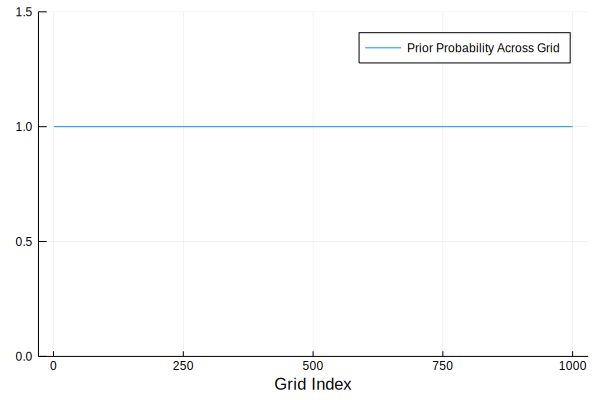

In [3]:
# for the one thousand values of p, assign prior probabilities
# here we assume a uniform distribution
# integral or probability must be equal to 1, so if p is between 0 and 1, uniform probability for all p is 1
prob_p = ones(length(p_grid))
plot(prob_p, ylims=(0,1.5), label="Prior Probability Across Grid", xlabel="Grid Index")

## Probability of the Data (Likelihood)

We model our process using a Binomial Distribution. This effectively says for each of the thousand values of $p$, what is the likelihood that $p$ is equal to that value (given 9 tosses and 6 successes)

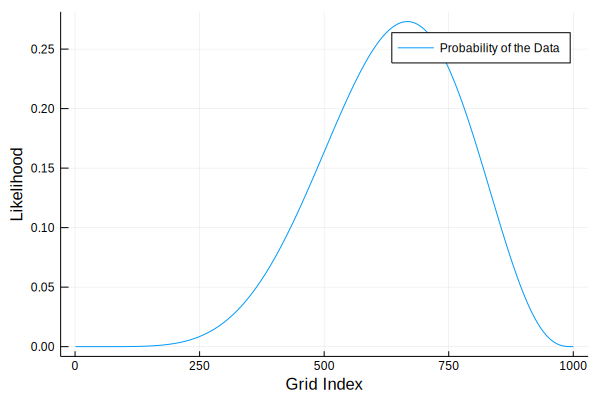

In [45]:
#=
Here we implement our model
assuming that our process is modelled by a Binomial distribution,
what is the likelihood for each value of p (for 9 tosses and 6 successes)?
this likelihood is the pdf of the Binomial distribution of 9 tries, 6 successes and where p is defined by p_grid
=#
prob_data = @.pdf(Distributions.Binomial(9, p_grid), 6) # dot syntax macro
plot(prob_data, label="Probability of the Data", xlabel="Grid Index", ylabel="Likelihood")

## Posterior Calculation

In [62]:
posterior = prob_data .* prob_p;
posterior_standardised = posterior / sum(posterior);

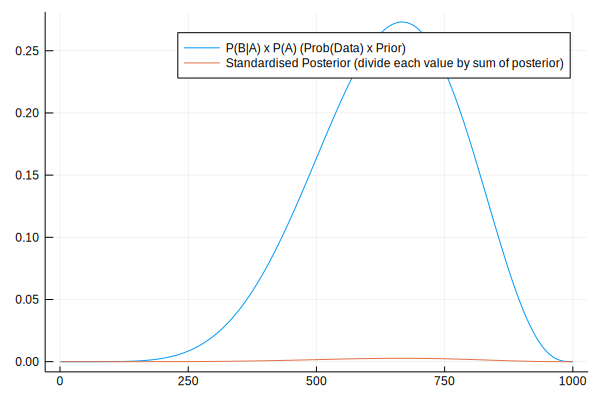

In [22]:
plot(1:1000,
     [posterior posterior_standardised],
     labels=["P(B|A) x P(A) (Prob(Data) x Prior)" "Standardised Posterior (divide each value by sum of posterior)"])

### Sampling from the posterior

In [46]:
# 10,000 samples (with replacement) from p_grid based on the weights specified by the standardised posterior
samples = sample(p_grid, Weights(posterior_standardised), 10000, replace=true)
scatter(samples)

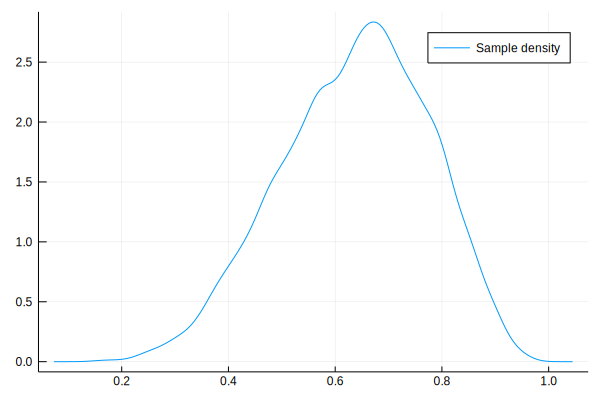

In [17]:
# kernel density estimate - estimate distribution of p
StatsPlots.density(samples, lab="Sample density")

### Posterior Predictive Distribution

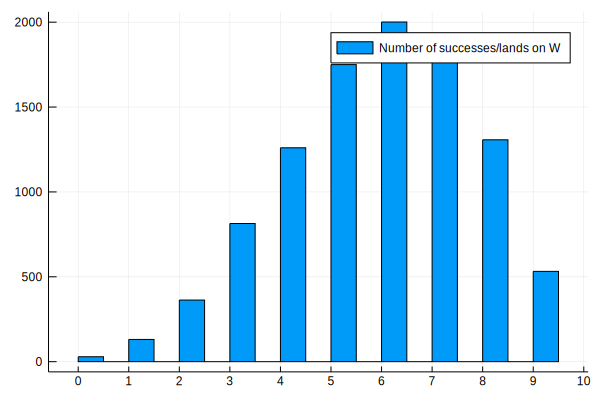

In [61]:
#=
Using our sampled values of p, try and recreate the data (6 successes from 9 tries)
We can do this by initialising Binomial distributions with p as specified by the samples
and then sampling from these distributions
=#
# create an array of distributions for eah sampled value of p
binomial_dists = Binomial.(9, samples)
# randomly select 10,000 samples from the array of distributions, then sample the distribution in turn
posterior_predictive = rand.(rand(binomial_dists,10000))
# plot histogram
histogram(posterior_predictive, label="Number of successes/lands on W",
          xticks=0:1:10, bar_edges=true)

6 is the most likely plausible (as expected based on data) but overdispersed Binomial distribution as model is not confident in true value of $p$